In [45]:
import xarray as xr
import numpy as np

import matplotlib.pyplot as plt
import xrft

In [46]:
dt = np.dtype([('re', np.int16), ('im', np.int16)])

a = np.fromfile(f'test_211-60s.dat', dtype=dt)
			

b = np.zeros(len(a), dtype=np.complex64)
b[:].real = a['re']/(2**15)
b[:].imag = a['im']/(2**15)

sample_rate = int(250e3)
dt = 1/sample_rate

print(f"{len(b)/sample_rate:0.2f}s recorded")



bins = 1024*2

# remove 1 sample at the beginning and end
b = b[bins:-bins]

N = len(b)//bins



time = np.arange(N*bins)*dt
b = b[-N*bins:]

# b = np.split(b,N)
# t = np.split(time, N)



60.00s recorded


In [47]:

da = xr.DataArray(b, dims=["samples"], coords={"time":("samples",time)})
da = da.chunk(bins)



In [48]:

da_fft = xrft.fft(da, dim='samples', shift=True, chunks_to_segments=True)

da_fft


<xarray.DataArray (samples_segment: 7322, freq_samples: 2048)>
dask.array<mul, shape=(7322, 2048), dtype=complex128, chunksize=(1, 2048), chunktype=numpy.ndarray>
Coordinates:
  * samples_segment  (samples_segment) int32 0 1 2 3 4 ... 7318 7319 7320 7321
  * freq_samples     (freq_samples) float64 -0.5 -0.4995 -0.499 ... 0.499 0.4995

In [49]:
mag_fft = np.abs(da_fft)

#20*np.log10(mag_fft).plot(x="freq_samples", hue="samples_segment", add_legend=False);


[1024 1024 1024 ... 1024 1024 1024]


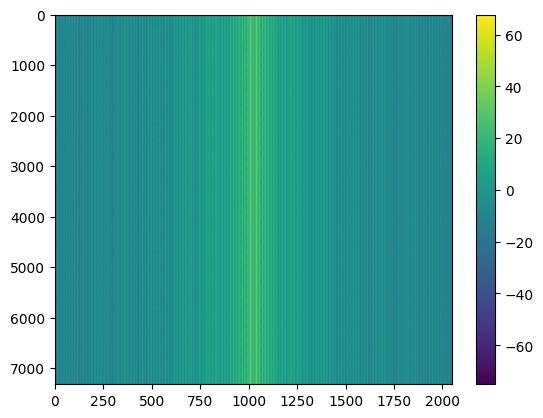

In [50]:
plt.imshow(20*np.log10(mag_fft), aspect='auto')
plt.colorbar();


bins = mag_fft.argmax(dim="freq_samples").to_numpy()

print(bins)

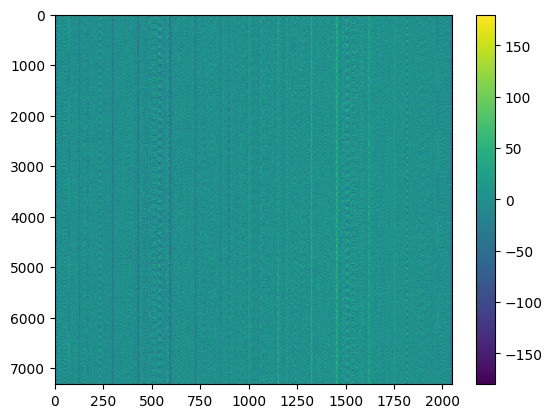

In [51]:
x= np.angle(da_fft, deg=True)
plt.imshow(x, aspect='auto')
plt.colorbar();

In [52]:
#get bin with heighest power

assert np.all(np.isclose(bins, bins[0]))


std: 0.11°
mean: -45.59°


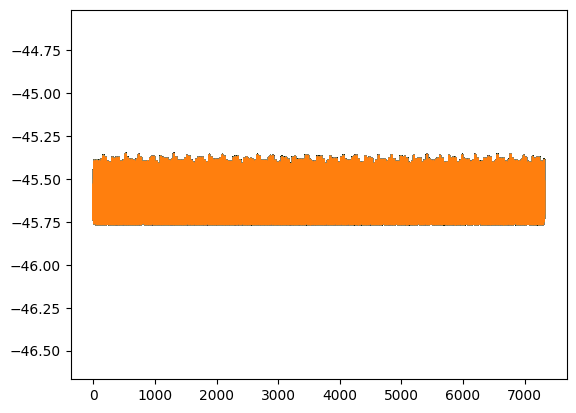

In [53]:

std = np.std(x[:,bins])
avg = np.mean(x[:, bins])

print(f"std: {std:0.2f}°")
print(f"mean: {avg:0.2f}°")

plt.ylim(avg-10*std, avg+10*std)
plt.plot(x[:, bins]);


# std: 0.004605273102467117
# mean: 0.7582005213087222
